<h1>Multifile LDA demo</h1>

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pylab as plt
import numpy as np
import pandas as pd
from IPython.display import display, HTML

from multifile_lda import MultifileLDA

<h2>1. Extract features for LDA</h2>

Create a new multifile LDA object and load the input files for beer1, 2, 3 (ignore the misleading filenames).

In [2]:
input_set = [
             ('input/beer3pos_ms1_1.csv','input/beer3pos_ms2_1.csv'),
             ('input/beer3pos_ms1_2.csv','input/beer3pos_ms2_2.csv'),
             ('input/beer3pos_ms1_3.csv','input/beer3pos_ms2_3.csv')
             ]

Extract word features from MS1 and MS2 tables. Previously this was done in R, now it's in Python.

Then normalise the data the same way as in the single-file version: within each fragmentation spectrum, we divide the MS2 intensities by the max MS2 intensity in the same spectrum and multiplying by *scaling_factor*.

In [3]:
scaling_factor=10 # previously set to 100 in the single file LDA 
lda = MultifileLDA()
lda.load_all(input_set, scaling_factor, 1)

Loading input/beer3pos_ms1_1.csv
Loading input/beer3pos_ms2_1.csv
Loading input/beer3pos_ms1_2.csv
Loading input/beer3pos_ms2_2.csv
Loading input/beer3pos_ms1_3.csv
Loading input/beer3pos_ms2_3.csv
Processing fragments for file 0
Processing fragments for file 1
Processing fragments for file 2
Total groups=2032
Processing losses for file 0
Processing losses for file 1
Processing losses for file 2
Total groups=234
Populating dataframe for fragment group 0/2032
Populating dataframe for fragment group 100/2032
Populating dataframe for fragment group 200/2032
Populating dataframe for fragment group 300/2032
Populating dataframe for fragment group 400/2032
Populating dataframe for fragment group 500/2032
Populating dataframe for fragment group 600/2032
Populating dataframe for fragment group 700/2032
Populating dataframe for fragment group 800/2032
Populating dataframe for fragment group 900/2032
Populating dataframe for fragment group 1000/2032
Populating dataframe for fragment group 1100/2

<h2>2. Run multifile LDA on all the 3 files.</h2>

In [ ]:
K = 300
n_samples = 1000
n_burn = 0
n_thin = 1
alpha = 50.0/K
beta = 0.1
lda.run(K, alpha, beta, n_burn, n_samples, n_thin)

In [5]:
lda.save_project('results/beer_analysis.project', 'Initial test by Joe')

Project saved to results/beer_analysis.project time taken = 7.786206007


Or load an existing project

In [167]:
lda = MultifileLDA.resume_from('results/beer_analysis.project')

Project loaded from results/beer_analysis.project time taken = 4.20000290871


In [168]:
lda.do_thresholding(th_doc_topic=0.05, th_topic_word=0.01)

In [ ]:
lda.print_top_words()

<h2>3. Ferulic Acid</h2>

From the excel doc, fragments indicative of ferulic acid substructure are:
- fragment_177.0547
- fragment_145.0284
- fragment_89.0386
- fragment_117.0331
- fragment_149.0599

From multifile LDA, we found the following three topics (113, 217, 262) that explain the set of fragments above. In fact, the three topics seem to be containing mostly the same fragments .. ? 

In [174]:
interesting = [262, 113, 217]
lda.print_top_words(with_probabilities=True, selected=interesting)

Mass2Motif 113: fragment_177.05474 (0.162), fragment_145.02849 (0.120), fragment_89.03865 (0.103), fragment_117.03319 (0.089), loss_130.0469 (0.017), fragment_149.05996 (0.014), fragment_322.21259 (0.010),

Mass2Motif 217: fragment_89.03865 (0.109), fragment_145.02849 (0.105), fragment_177.05474 (0.092), fragment_117.03319 (0.081), loss_130.0469 (0.020), fragment_364.22195 (0.015), fragment_114.10276 (0.011),

Mass2Motif 262: fragment_177.05474 (0.141), fragment_145.02849 (0.106), fragment_89.03865 (0.100), fragment_117.03319 (0.081), fragment_289.13702 (0.019), loss_130.0469 (0.018), fragment_121.07626 (0.018), fragment_144.08067 (0.012), fragment_149.05996 (0.012),



We plot the expected value of the Dirichlet prior on the document-topic distribution for each file. It seems each file has the tendency to form its own per-file topic, rather than sharing the same topic across files ..?
- Topic 113 has a high probability in file0 (beer1)
- Topic 262 has a high probability in file1 (beer2)
- Topic 217 has a high probability in file2 (beer3)

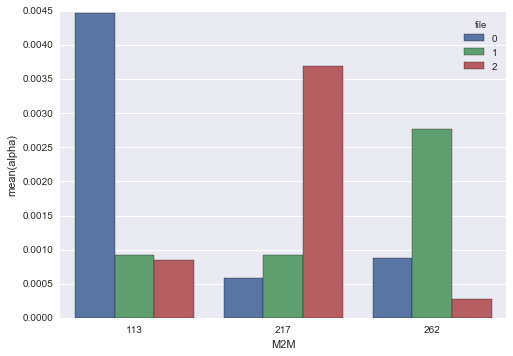

In [171]:
_ = lda.plot_e_alphas(interesting)

<h2>4. Histidine</h2>

From excel, the Histidine fragments are:
- fragment_110.0718
- fragment_156.0769
- fragment_93.0450
- fragment_95.0608

From multifile LDA, we found the following topics (70, 74, 284) that explain most of the Histdine fragments above, but in these topics, we also see a lot of other words that weren't there before in the Histidine topic for the single-file LDA .. e.g. loss_132.04202, fragment_83.06043, etc.

Mass2Motif 70: fragment_110.07169 (0.213), loss_132.04202 (0.188), fragment_83.06043 (0.059), fragment_156.07687 (0.028), fragment_82.05254 (0.023), loss_73.01609 (0.020), fragment_152.05642 (0.016), fragment_113.03411 (0.014), fragment_150.07841 (0.014), fragment_164.09267 (0.013), fragment_122.07177 (0.011),

Mass2Motif 74: fragment_110.07169 (0.236), fragment_83.06043 (0.081), loss_73.01609 (0.070), fragment_156.07687 (0.043), fragment_82.05254 (0.036), loss_125.04751 (0.032), fragment_93.0451 (0.023), fragment_81.04493 (0.016), fragment_122.07177 (0.013),

Mass2Motif 284: fragment_110.07169 (0.162), fragment_83.06043 (0.066), fragment_82.05254 (0.039), fragment_109.03971 (0.022), loss_73.01609 (0.022), fragment_122.07177 (0.017), fragment_156.07687 (0.017), fragment_81.04493 (0.017), fragment_93.0451 (0.013), fragment_167.09175 (0.010), loss_45.02143 (0.010),



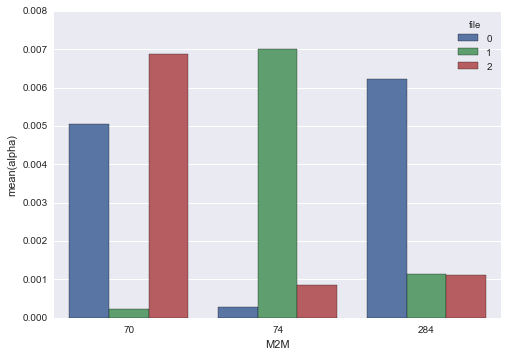

In [175]:
interesting = [70, 74, 284]
lda.print_top_words(with_probabilities=True, selected=interesting)
_ = lda.plot_e_alphas(interesting)

<h2>5. Phenylalanine</h2>

From excel, phenylalanine substucture are:
- fragment_120.0808
- fragment_103.0546
- fragment_91.0541

Mass2Motif 99: fragment_310.12719 (0.064), fragment_292.11654 (0.057), fragment_120.08049 (0.051), fragment_103.0545 (0.042), fragment_132.0814 (0.040), fragment_91.05413 (0.033), fragment_264.1244 (0.027), fragment_105.07018 (0.022), loss_198.07392 (0.020), fragment_166.08634 (0.020), loss_190.04773 (0.018), fragment_69.03369 (0.013), fragment_85.02834 (0.011),

Mass2Motif 158: fragment_120.08049 (0.199), fragment_103.0545 (0.074), fragment_91.05413 (0.061), fragment_292.11654 (0.053), fragment_132.0814 (0.040), loss_190.04773 (0.038), fragment_166.08634 (0.036), fragment_310.12719 (0.028), loss_178.04752 (0.023), fragment_130.06488 (0.019), fragment_112.03965 (0.019), fragment_79.05418 (0.018), fragment_264.1244 (0.017), loss_180.06327 (0.017), fragment_105.07018 (0.016), fragment_97.02839 (0.015), loss_144.04183 (0.013),

Mass2Motif 295: fragment_120.08049 (0.246), fragment_103.0545 (0.085), fragment_91.05413 (0.050), fragment_292.11654 (0.048), fragment_105.07018 (0.047), fragment_

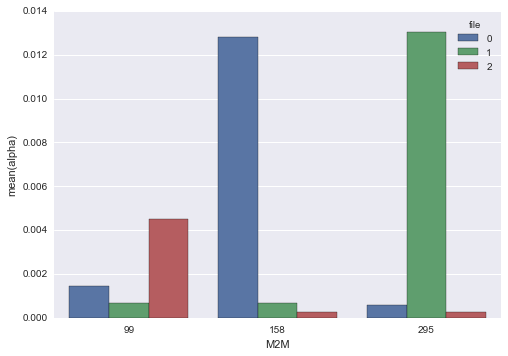

In [177]:
interesting = [99, 158, 295]
lda.print_top_words(with_probabilities=True, selected=interesting)
_ = lda.plot_e_alphas(interesting)